In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.metrics as sm
%matplotlib inline

In [58]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:

for i in df.columns:
    df[i].dtype == 'object'
    le = LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])

<AxesSubplot:>

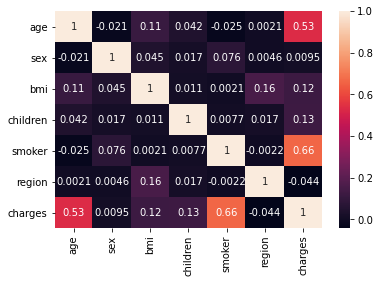

In [61]:
sns.heatmap(df.corr(), annot=True)

In [62]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=101)

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predictions')

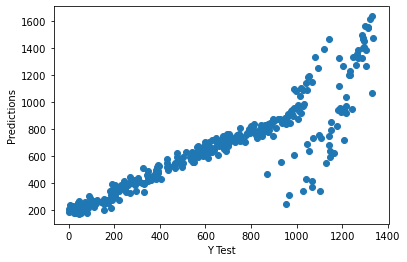

In [72]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

<AxesSubplot:xlabel='charges'>

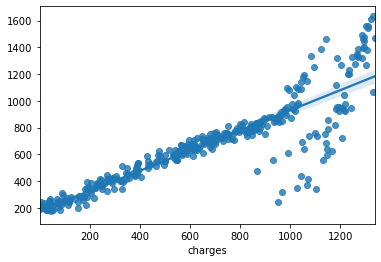

In [80]:
sns.regplot(x = y_test, y = predictions, data = [y_test, predictions])